In [120]:
from sklearn import cluster
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn import metrics
import time
import random

In [121]:
fileTestName = "2d-10c.arff"

colors = ['r','b','y','g', 'lime', 'bisque', 'lightcoral', 'mediumturquoise', 'sandybrown', 'black']
#colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             #for i in range(100)]
nbClusters = 9

def load_file(filepath):
    return arff.loadarff(open(filepath, 'r'))

In [124]:
data = load_file("./artificial/"+fileTestName)[0]

In [125]:

new_data = []
x_list = []
y_list = []
z_list = []
for (x,y,z) in data : 
    new_data.append([x,y])
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)

In [126]:
kmeans = cluster.KMeans(n_clusters=nbClusters, init='k-means++').fit(new_data)
labels = kmeans.labels_

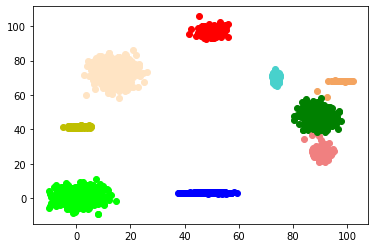

In [128]:
for (x,y,c) in zip(x_list, y_list, kmeans.labels_):
    plt.plot(x, y,'o',color=colors[c])


#plt.plot(x_list, y_list,'o',color=colors[indexColor])
plt.show()

In [90]:
i_max = -1
score_max = 0
starttime = time.time()

for i in range(2,3) :
    data_temp = new_data;
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++').fit(data_temp)
    labels = kmeans.labels_
    score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
    if score > score_max :
        i_max = i
        score_max = score

endtime = time.time()
print(i_max, score_max)
print(endtime - starttime)

2 0.44802300859128813
0.13776803016662598


In [129]:
def kMeans(fileTestName):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    z_list = []
    for (x,y,z) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)
    i_max = 0
    score_max = 0
    starttime = time.time()

    for i in range(2,100) :
        data_temp = new_data;
        kmeans = cluster.KMeans(n_clusters=i, init='k-means++').fit(data_temp)
        labels = kmeans.labels_
        score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
        if score > score_max :
            i_max = i
            score_max = score
    endtime = time.time()
    kmeans = cluster.KMeans(n_clusters=i_max, init='k-means++').fit(new_data)
    labels = kmeans.labels_
    for (x,y,c) in zip(x_list, y_list, kmeans.labels_):
        plt.plot(x, y,'o',color=colors[c])
    plt.show()
    print("best cluster number : ",i_max, " best score : ",score_max)
    print("time execution : ",endtime - starttime)

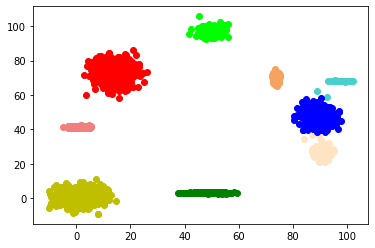

best cluster number :  9  best score :  0.8377446510558256
time execution :  32.12163734436035


In [130]:
kMeans("2d-10c.arff")

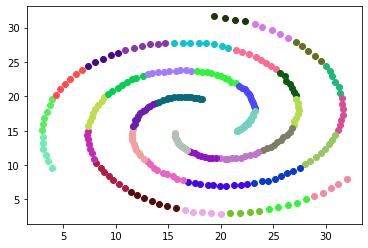

best cluster number :  38  best score :  0.4794828297254675
time execution :  3.1075572967529297


In [110]:
kMeans("3-spiral.arff")

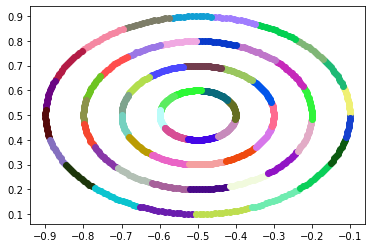

best cluster number :  58  best score :  0.48427280168185294
time execution :  13.659908294677734


In [113]:
kMeans("dartboard1.arff")